In [66]:
import pandas as pd
import matplotlib.pyplot as plt

In [170]:
df = pd.read_csv('HR_comma_sep.csv')
df.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [171]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_le = df
df_le.salary = le.fit_transform(df.salary)
df_le.sort_values('salary', ascending = False)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
7499,0.93,0.58,5,238,2,0,0,0,sales,2
3841,0.76,0.61,3,141,2,0,0,0,sales,2
5714,0.54,0.82,4,266,2,0,0,0,IT,2
11360,0.62,0.75,5,165,4,0,0,0,sales,2
11361,0.87,0.48,5,242,3,0,0,0,sales,2
...,...,...,...,...,...,...,...,...,...,...
5865,0.17,0.91,6,246,5,0,0,0,IT,0
12618,0.45,0.57,2,148,3,0,1,0,marketing,0
7572,0.62,0.76,4,163,3,0,0,0,sales,0
10245,0.79,0.56,4,177,3,0,0,0,sales,0


In [172]:
left = df[df.left==1]
left

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,1
1,0.80,0.86,5,262,6,0,1,0,sales,2
2,0.11,0.88,7,272,4,0,1,0,sales,2
3,0.72,0.87,5,223,5,0,1,0,sales,1
4,0.37,0.52,2,159,3,0,1,0,sales,1
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,1
14995,0.37,0.48,2,160,3,0,1,0,support,1
14996,0.37,0.53,2,143,3,0,1,0,support,1
14997,0.11,0.96,6,280,4,0,1,0,support,1


<AxesSubplot:xlabel='salary'>

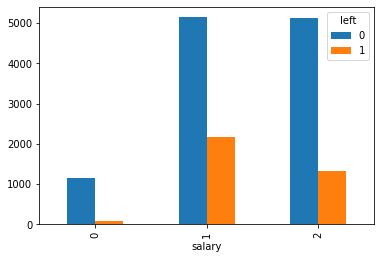

In [173]:
pd.crosstab(df.salary, df.left).plot(kind='bar')

<AxesSubplot:xlabel='Department'>

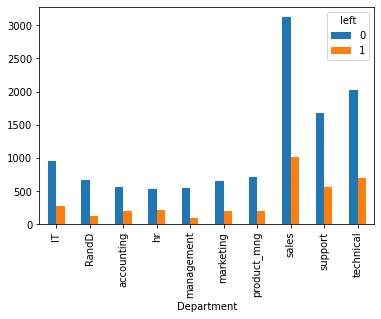

In [174]:
pd.crosstab(df.Department,df.left).plot(kind='bar')

In [175]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [176]:
subdf=df[['satisfaction_level', 'average_montly_hours','promotion_last_5years','salary']]
subdf

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,1
1,0.80,262,0,2
2,0.11,272,0,2
3,0.72,223,0,1
4,0.37,159,0,1
...,...,...,...,...
14994,0.40,151,0,1
14995,0.37,160,0,1
14996,0.37,143,0,1
14997,0.11,280,0,1


In [202]:
x =  pd.get_dummies(subdf.salary, prefix = 'salary')
x = pd.concat([subdf,x],axis=1)
x = x.drop('salary',axis='columns')

In [178]:
y  = df.left

In [179]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.75)

In [204]:
lr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [203]:
lr.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [205]:
lr.score(x_test,y_test)

0.7661333333333333